### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [3]:
!pip install -U tensorflow==2.0 --quiet

     |████████████████████████████████| 86.3MB 36.9MB/s 
     |████████████████████████████████| 3.8MB 40.9MB/s 
     |████████████████████████████████| 450kB 40.1MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.2 which is incompatible.


In [0]:
import tensorflow as tf

In [5]:
tf.__version__

'1.15.0'

#### Collect Fashion mnist data from tf.keras.datasets 

In [6]:
import keras

Using TensorFlow backend.


In [7]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#### Change train and test labels into one-hot vectors

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Build the Graph

#### Initialize model, reshape & normalize data

In [11]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784 2D amtrix converted to 1D matrix 
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data - getting numbers between 0 to 1 
model.add(tf.keras.layers.BatchNormalization())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
#Dropout layer
model.add(tf.keras.layers.Dropout(0.25))


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
______________________________________________

In [16]:
#Train the model
model.fit(trainX,trainY,
          validation_data=(testX,testY),
          epochs=40,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 9s 149us/sample - loss: 0.5118 - acc: 0.8174 - val_loss: 0.4052 - val_acc: 0.8498
Epoch 2/40
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3967 - acc: 0.8546 - val_loss: 0.4004 - val_acc: 0.8553
Epoch 3/40
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3637 - acc: 0.8665 - val_loss: 0.3596 - val_acc: 0.8682
Epoch 4/40
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3346 - acc: 0.8779 - val_loss: 0.3531 - val_acc: 0.8729
Epoch 5/40
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3169 - acc: 0.8830 - val_loss: 0.3617 - val_acc: 0.8794
Epoch 6/40
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2978 - acc: 0.8888 - val_loss: 0.3616 - val_acc: 0.8790
Epoch 7/40
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2858 - acc: 0.8924 - val_l

In [0]:
model.save('dnn_1.h5')

In [18]:
model = tf.keras.models.load_model('dnn_1.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
testX[0:5].shape

(5, 28, 28)

In [0]:
import numpy as np

In [21]:
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

In [22]:
pred = model.predict(input_data)
#pred
print(pred)

[[6.5045983e-17 1.2557242e-22 5.1488343e-19 9.3432472e-17 5.0743854e-20
  3.0924457e-07 3.6599572e-17 5.9291924e-05 4.7370275e-15 9.9994040e-01]]


In [23]:
pred[0]

array([6.5045983e-17, 1.2557242e-22, 5.1488343e-19, 9.3432472e-17,
       5.0743854e-20, 3.0924457e-07, 3.6599572e-17, 5.9291924e-05,
       4.7370275e-15, 9.9994040e-01], dtype=float32)

In [24]:
np.argmax(pred[0])

9

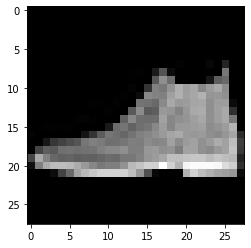

In [25]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[0],cmap='gray')

In [26]:
np.argmax(testY[0])

9

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
______________________________________________

In [0]:
_,(testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [43]:
testX[0:1].shape

(1, 28, 28)

In [44]:
model.input

<tf.Tensor 'reshape_input_1:0' shape=(?, 28, 28) dtype=float32>

In [0]:
import numpy as np

In [46]:
np.expand_dims(testX[0], axis=0).shape

(1, 28, 28)

In [47]:
#Actual Label for the first example in test dataset
print(testY[0])

9


In [48]:
testX[0:1].shape

(1, 28, 28)

In [49]:
model.input

<tf.Tensor 'reshape_input_1:0' shape=(?, 28, 28) dtype=float32>

In [50]:
#Model prediction
prediction = model.predict(testX[0:1])

#Print prediction
print(prediction)

[[6.5045983e-17 1.2557242e-22 5.1488343e-19 9.3432472e-17 5.0743854e-20
  3.0924457e-07 3.6599572e-17 5.9291924e-05 4.7370275e-15 9.9994040e-01]]


In [51]:
#Get predicted number with highest probability
predicted_num = np.argmax(prediction[0])

#Print the number
print(predicted_num)

9


In [52]:
testY[0]

9

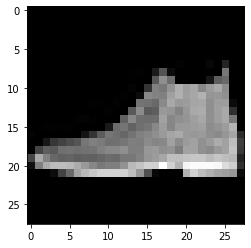

In [53]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[0],cmap='gray')